# Lambda School, Intro to Data Science, Day 8 — Classification!

## Assignment

Run this cell to load the Titanic data:

In [0]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
train, test = train_test_split(sns.load_dataset('titanic').drop(columns=['alive']), random_state=0)
target = 'survived'

Then, train a [Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba), [Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), or [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model. Use any features and parameters you want. 

Try to get better than 78.0% accuracy on the test set! (This is not required, but encouraged.)

Do refer to the lecture notebook — but try not to copy-paste.

> You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons. —*[Learn Python the Hard Way](https://learnpythonthehardway.org/book/intro.html)*

After this, you may want to try [Kaggle's Titanic challenge](https://www.kaggle.com/c/titanic)!

In [0]:
# accuracy score predictions for titanic survivors
predictions = [0] * len(train)
from sklearn.metrics import accuracy_score
accuracy_score(train.survived, predictions)

0.6137724550898204

In [0]:
# checking for null values in train and test
train.sex.isnull().sum()

0

In [0]:
train.age.isnull().sum()

133

In [0]:
test.sex.isnull().sum()

0

In [0]:
test.age.isnull().sum()

44

In [0]:
# replacing null values with train age mean in both
train.age.fillna(train.age.mean(), inplace=True)
test.age.fillna(train.age.mean(), inplace=True)

In [0]:
train.age.isnull().sum()

0

In [0]:
test.age.isnull().sum()

0

In [0]:
# changing female object to boolean/integer
train['female'] = train.sex == 'female'
test['female'] = test.sex == 'female'

In [0]:
# logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
features = ['female', 'age']
target = 'survived'

model.fit(train[features], train[target])

# train accuracy
train_true = train[target]
train_pred = model.predict(train[features])
print('Train accuracy:', accuracy_score(train_true, train_pred))

# test accuracy
test_true = test[target]
test_pred = model.predict(test[features])
print('Test accuracy:', accuracy_score(test_true, test_pred))

Train accuracy: 0.7889221556886228
Test accuracy: 0.7802690582959642


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4)
model.fit(train[features], train[target])

# train accuracy
train_true = train[target]
train_pred = model.predict(train[features])
print('Train accuracy:', accuracy_score(train_true, train_pred))

# test accuracy
test_true = test[target]
test_pred = model.predict(test[features])
print('Test accuracy:', accuracy_score(test_true, test_pred))

Train accuracy: 0.8023952095808383
Test accuracy: 0.7892376681614349


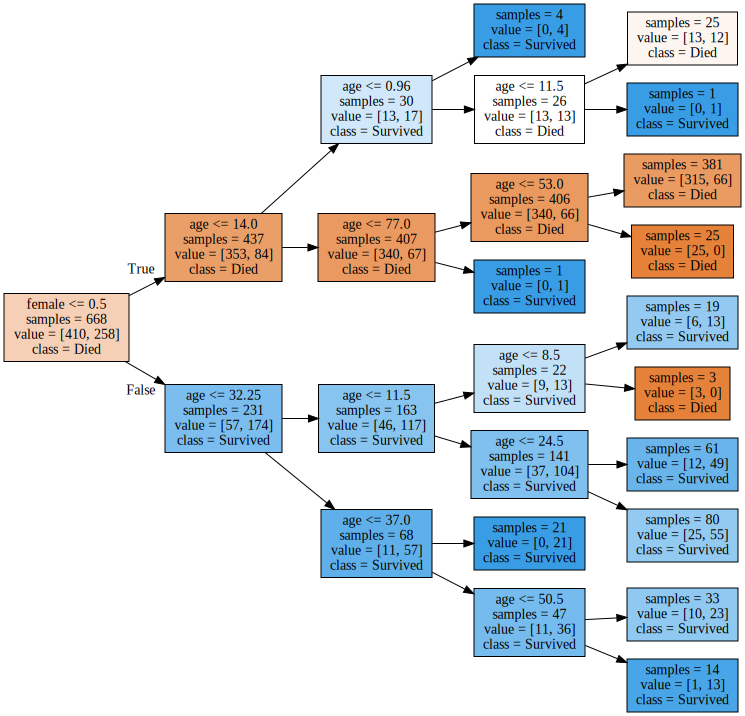

In [0]:
# decision tree visual
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=features,
    class_names=['Died', 'Survived'],
    filled=True,
    impurity=False,
    rotate=True
)

graphviz.Source(dot_data)